In [34]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import random
import pylab 
plt.rcParams['figure.figsize'] = [10, 5]

In [44]:
df = pd.read_csv("./classified.csv")
df["Age"]=2020-df["Earliest_Pub"]
df["citperyear"] = df["Citations"]/df["Age"]
df["citperyear13"] = df["Citations"]/df["Age"]**1.3

#to debug
df = df[df["Age"]>=0]
df.head()

,Name,School,Gender,Role,Citations,Earliest_Pub,Field_1,Field_2,Major field,Age,citperyear,citperyear13
0,Matthias Kawski,Arizona State University,Male,Professor,223.0,1986.0,Systems theory; control,NaN,Applied Math,34.0,6.558824,2.277101
1,Robert McCulloch,Arizona State University,Male,Professor,148.0,1985.0,Statistics,NaN,Statistics,35.0,4.228571,1.455369
2,Carl Gardner,Arizona State University,Male,Professor,172.0,1983.0,"Statistical mechanics, structure of matter",NaN,Mathematical Physics,37.0,4.648649,1.573498
3,Sergei Suslov,Arizona State University,Male,Professor,703.0,1982.0,Special functions,NaN,Analysis,38.0,18.500000,6.212074
4,Al Boggess,Arizona State University,Male,Professor,346.0,1979.0,Several complex variables and analytic spaces,NaN,Complex Analysis,41.0,8.439024,2.769855


## Distribution of Citations and Citations/Year1.3

Text(0, 0.5, 'Count')

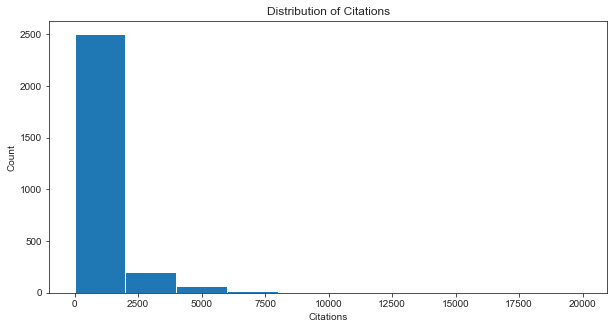

In [45]:
plt.hist(df.Citations)
plt.title("Distribution of Citations")
plt.xlabel("Citations")
plt.ylabel("Count")

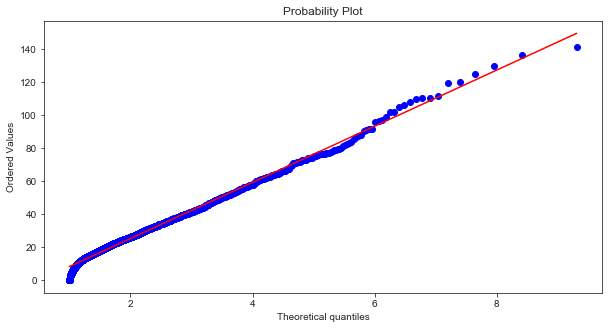

In [49]:
fig = plt.figure()
ax = plt.subplot(111)
stats.probplot(df.Citations**0.5, dist=stats.expon, sparams=1.0, plot=ax)
plt.show()

Text(0, 0.5, 'Count')

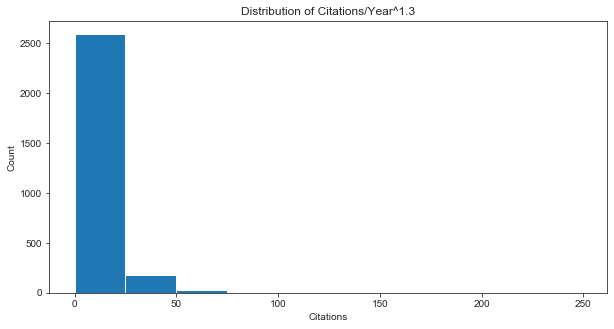

In [50]:
plt.hist(df.citperyear13)
plt.title("Distribution of Citations/Year^1.3")
plt.xlabel("Citations")
plt.ylabel("Count")

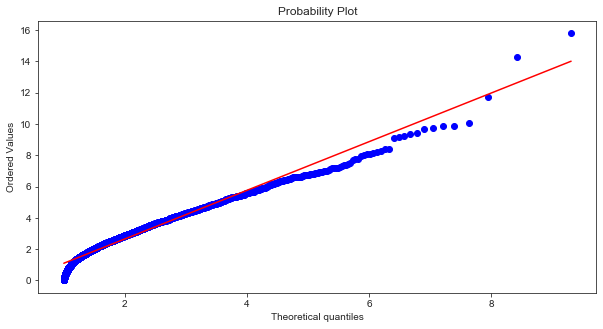

In [51]:
fig = plt.figure()
ax = plt.subplot(111)
stats.probplot(df.citperyear13**0.5, dist=stats.expon, sparams=1.0, plot=ax)
plt.show()

## Citations and Age

In [77]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["Age"],df["citperyear13"])

confidence_interval = 1.96*std_err
print("slope:", slope)
print("intercept:", intercept)
print("r", r_value)
print("pvalue", p_value)
print([slope-confidence_interval, slope+confidence_interval])

slope: 0.03383062665247128
intercept: 8.396234644794568
r 0.029228386522290237
pvalue 0.12157561478012142
[-0.008985684829031844, 0.07664693813397441]


In [78]:
x = np.linspace(0,70,1000)
y = slope*x + intercept

Text(0, 0.5, 'Citations/Year^1.3')

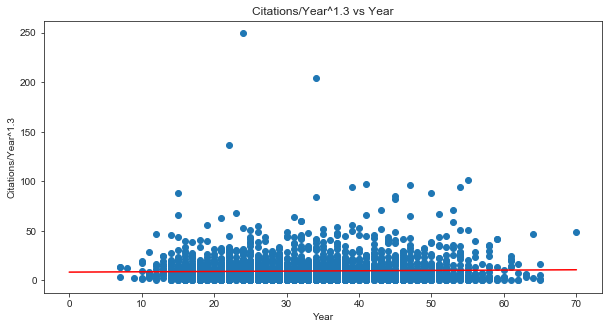

In [79]:
plt.scatter(df["Age"],df["citperyear13"])
plt.plot(x,y,color='red')
plt.title("Citations/Year^1.3 vs Year")
plt.xlabel("Year")
plt.ylabel("Citations/Year^1.3")

## Hasse Linear Models is in RMarkdown

## Field Means and Medians

In [55]:
field = pd.pivot_table(df,index=["Major field"],values=["Citations"],aggfunc=[np.mean])
# change to median
field.unstack().sort_values(ascending=False)

                 Major field         
mean  Citations  PDE                     1472.069892
                 Computer Science        1260.444444
                 Probability             1165.919708
                 Harmonic analysis       1120.015000
                 Combinatorics           1023.241379
                 Analysis                 977.177778
                 Algebra                  934.422727
                 Geometry                 890.684887
                 Algebraic Geometry       846.621302
                 Number theory            742.660377
                 Group theory             686.382716
                 Applied Math             646.602007
                 Mathematical Physics     643.010417
                 Logic                    634.000000
                 Complex Analysis         612.860870
                 Dynamics                 560.441176
                 Lie Groups               512.023256
                 Statistics               220.734940
        

In [56]:
field = pd.pivot_table(df,index=["Major field"],values=["citperyear13"],aggfunc=[np.mean])

field.unstack().sort_values(ascending=False)

                    Major field         
mean  citperyear13  PDE                     14.576598
                    Computer Science        14.080446
                    Probability             12.062677
                    Harmonic analysis       10.514860
                    Combinatorics           10.084229
                    Algebraic Geometry       9.509696
                    Algebra                  9.116993
                    Geometry                 8.868060
                    Number theory            7.382772
                    Dynamics                 7.326294
                    Mathematical Physics     7.248634
                    Analysis                 7.148419
                    Applied Math             6.870968
                    Group theory             6.737234
                    Logic                    6.317548
                    Complex Analysis         6.170996
                    Lie Groups               4.780825
                    Statistics           

In [57]:
count = pd.pivot_table(df,index=["Major field"],values=["citperyear13"],aggfunc=[len])
count.unstack().sort_values(ascending=False)[:30]

                   Major field         
len  citperyear13  PDE                     372.0
                   Geometry                311.0
                   Applied Math            299.0
                   Computer Science        225.0
                   Algebra                 220.0
                   Harmonic analysis       200.0
                   Algebraic Geometry      169.0
                   Number theory           159.0
                   Probability             137.0
                   Combinatorics           116.0
                   Complex Analysis        115.0
                   Mathematical Physics     96.0
                   Statistics               83.0
                   Group theory             81.0
                   Dynamics                 68.0
                   Logic                    55.0
                   Analysis                 45.0
                   Lie Groups               43.0
                   Other                    11.0
                   History   

In [58]:
PDE = df[df["Major field"]=="PDE"]["citperyear13"].values
CS = df[df["Major field"]=="Computer Science"]["citperyear13"].values
Probability = df[df["Major field"]=="Probability"]["citperyear13"].values
Harmonic_Analysis = df[df["Major field"]=="Harmonic analysis"]["citperyear13"].values
Comb = df[df["Major field"]=="Combinatorics"]["citperyear13"].values
Algebra = df[df["Major field"]=="Algebra"]["citperyear13"].values
Alg_Geometry = df[df["Major field"]=="Algebraic Geometry"]["citperyear13"].values
Geometry = df[df["Major field"]=="Geometry"]["citperyear13"].values
Number_Theory = df[df["Major field"]=="Number theory"]["citperyear13"].values
Dynamics = df[df["Major field"]=="Dynamics"]["citperyear13"].values
M_Physics = df[df["Major field"]=="Mathematical Physics"]["citperyear13"].values
Analysis = df[df["Major field"]=="Analysis"]["citperyear13"].values
Applied_Math = df[df["Major field"]=="Applied Math"]["citperyear13"].values
Groups = df[df["Major field"]=="Group theory"]["citperyear13"].values
Logic = df[df["Major field"]=="Logic"]["citperyear13"].values
Complex_Analysis = df[df["Major field"]=="Complex Analysis"]["citperyear13"].values
Lie_Groups = df[df["Major field"]=="Lie Groups"]["citperyear13"].values
Statistics = df[df["Major field"]=="Statistics"]["citperyear13"].values
History = df[df["Major field"]=="History"]["citperyear13"].values
Other = df[df["Major field"]=="Other"]["citperyear13"].values

L = [("PDE",PDE),("CS",CS),("Prob",Probability), ("HA",Harmonic_Analysis), ("C",Comb), ("Alg",Algebra)
     ,("AG",Alg_Geometry), ("GEOM",Geometry), ("NT",Number_Theory),
    ("Dyn",Dynamics), ("MP",M_Physics), ("An",Analysis), ("Applied",Applied_Math), ("GT",Groups)
     , ("Log",Logic), ("CA",Complex_Analysis), ("LG",Lie_Groups), ("Stat",Statistics),
    ("Hist",History), ("Oth",Other)]

In [59]:
def run_permutation_test(pooled,sizeZ,sizeY):
    np.random.shuffle(pooled)
    starZ = pooled[:sizeZ]
    starY = pooled[-sizeY:]
    return starY.mean() - starZ.mean()
def check(list1): 
    count = 0
    for x in list1: 
        if x<= delta: 
            count +=1
    return count/len(list1)

In [60]:
#H0 Z = Y
#H1 Z > Y
done = []
for z in L:
    done.append(z)
    for y in L:
        if y not in done:
            np.random.seed(0)
            pooled = np.hstack([z[1],y[1]])
            delta = y[1].mean() - z[1].mean()
            numSamples = 10000
            l=[]
            for i in range(numSamples):
                x = run_permutation_test(pooled,z[1].size,y[1].size)
                l.append(x)
            if check(l) > 0.05:
                print("Fail to Reject Null:", z[0], ">=", y[0], "p-value:", check(l))

Fail to Reject Null: PDE >= CS p-value: 0.397
Fail to Reject Null: PDE >= Prob p-value: 0.0768
Fail to Reject Null: CS >= Prob p-value: 0.156
Fail to Reject Null: Prob >= HA p-value: 0.113
Fail to Reject Null: Prob >= C p-value: 0.1049
Fail to Reject Null: HA >= C p-value: 0.3824
Fail to Reject Null: HA >= Alg p-value: 0.0961
Fail to Reject Null: HA >= AG p-value: 0.1807
Fail to Reject Null: C >= Alg p-value: 0.2181
Fail to Reject Null: C >= AG p-value: 0.3265
Fail to Reject Null: C >= GEOM p-value: 0.1544
Fail to Reject Null: C >= An p-value: 0.0719
Fail to Reject Null: Alg >= AG p-value: 0.6461
Fail to Reject Null: Alg >= GEOM p-value: 0.3989
Fail to Reject Null: Alg >= Dyn p-value: 0.0813
Fail to Reject Null: Alg >= MP p-value: 0.0546
Fail to Reject Null: Alg >= An p-value: 0.1232
Fail to Reject Null: AG >= GEOM p-value: 0.2533
Fail to Reject Null: AG >= An p-value: 0.0782
Fail to Reject Null: GEOM >= NT p-value: 0.0534
Fail to Reject Null: GEOM >= Dyn p-value: 0.1076
Fail to Reject

## Variability Hypothesis

In [61]:
print(np.mean(df.Citations))
print(np.std(df.Citations))

931.9597434983968
1500.2868283479086


In [62]:
Females = df[df.Gender == "Female"]
Males = df[df.Gender == "Male"]
print("Female Mean", np.mean(Females.Citations))
print("Female Variance", np.var(Females.Citations))
print("Male Mean", np.mean(Males.Citations))
print("Male Variance", np.var(Males.Citations))

Female Mean 475.7096774193548
Female Variance 511979.92861602537
Male Mean 988.6027232679215
Male Variance 2437689.032399479


In [63]:
print("Female Mean", np.mean(Females.citperyear13))
print("Female Variance", np.var(Females.citperyear13))
print("Male Mean", np.mean(Males.citperyear13))
print("Male Variance", np.var(Males.citperyear13))

Female Mean 6.185259695940214
Female Variance 61.87624234454585
Male Mean 9.924544583298573
Male Variance 177.20499362227673


# permutation test

In [64]:
FieldNames = ["PDE","Computer Science","Probability","Harmonic analysis","Combinatorics","Algebra"
              ,"Algebraic Geometry","Geometry","Number theory","Dynamics","Mathematical Physics"
              ,"Analysis","Applied Math","Group theory","Logic","Complex Analysis","Lie Groups"
              ,"Statistics","History","Other"]

In [65]:
#H0 Z = Y
#H1 Z > Y
for x in FieldNames:
    M = df[(df["Major field"]==x)&(df["Gender"]=="Male")]["citperyear13"].values
    F = df[(df["Major field"]==x)&(df["Gender"]=="Female")]["citperyear13"].values
    np.random.seed(0)
    pooled = np.hstack([M,F])
    delta = F.mean() - M.mean()
    numSamples = 10000
    l=[]
    for i in range(numSamples):
        y = run_permutation_test(pooled,M.size,F.size)
        l.append(y)
    if check(l) > 0.05:
        print(x," - Fail to Reject Null:", "p-value:", check(l))
    else:
        print(x, " - Reject Null:",  "p-value:", check(l))

PDE  - Reject Null: p-value: 0.0066
Computer Science  - Reject Null: p-value: 0.0346
Probability  - Reject Null: p-value: 0.0035
Harmonic analysis  - Fail to Reject Null: p-value: 0.2648
Combinatorics  - Fail to Reject Null: p-value: 0.2133
Algebra  - Reject Null: p-value: 0.0287
Algebraic Geometry  - Reject Null: p-value: 0.0459
Geometry  - Reject Null: p-value: 0.0096
Number theory  - Reject Null: p-value: 0.0092
Dynamics  - Fail to Reject Null: p-value: 0.145
Mathematical Physics  - Fail to Reject Null: p-value: 0.8623
Analysis  - Reject Null: p-value: 0.0074
Applied Math  - Fail to Reject Null: p-value: 0.1121
Group theory  - Fail to Reject Null: p-value: 0.1791
Logic  - Fail to Reject Null: p-value: 0.0755
Complex Analysis  - Reject Null: p-value: 0.0093
Lie Groups  - Fail to Reject Null: p-value: 0.128
Statistics  - Fail to Reject Null: p-value: 0.0589
History  - Fail to Reject Null: p-value: 1.0
Other  - Fail to Reject Null: p-value: 0.1849


In [66]:
field = pd.pivot_table(Males,index=["Major field"],values=["citperyear13"],aggfunc=[np.mean])

field.unstack().sort_values(ascending=False)

                    Major field         
mean  citperyear13  PDE                     15.303093
                    Computer Science        14.778782
                    Probability             12.834559
                    Harmonic analysis       10.669366
                    Combinatorics           10.430640
                    Algebraic Geometry       9.819881
                    Algebra                  9.560960
                    Geometry                 9.255244
                    Analysis                 7.935402
                    Number theory            7.679638
                    Dynamics                 7.636188
                    Applied Math             7.161173
                    Group theory             6.968285
                    Mathematical Physics     6.958035
                    Logic                    6.573246
                    Complex Analysis         6.459399
                    Lie Groups               5.083902
                    Statistics           

In [67]:
field = pd.pivot_table(Males,index=["Major field"],values=["citperyear13"],aggfunc=[len])

field.unstack().sort_values(ascending=False)

                   Major field         
len  citperyear13  PDE                     327.0
                   Geometry                279.0
                   Applied Math            250.0
                   Computer Science        200.0
                   Algebra                 192.0
                   Harmonic analysis       183.0
                   Algebraic Geometry      156.0
                   Number theory           147.0
                   Probability             124.0
                   Complex Analysis        107.0
                   Combinatorics           101.0
                   Mathematical Physics     88.0
                   Group theory             74.0
                   Statistics               72.0
                   Dynamics                 59.0
                   Logic                    51.0
                   Analysis                 40.0
                   Lie Groups               37.0
                   Other                     9.0
                   History   

In [68]:
field = pd.pivot_table(Females,index=["Major field"],values=["citperyear13"],aggfunc=[np.mean])

field.unstack().sort_values(ascending=False)

                    Major field         
mean  citperyear13  Mathematical Physics    10.445227
                    PDE                      9.297398
                    Harmonic analysis        8.851647
                    Computer Science         8.493759
                    Combinatorics            7.751730
                    Algebra                  6.072650
                    Algebraic Geometry       5.787476
                    Geometry                 5.492292
                    Applied Math             5.390328
                    Dynamics                 5.294767
                    Probability              4.700109
                    Group theory             4.294694
                    Number theory            3.746161
                    Logic                    3.057404
                    Lie Groups               2.911850
                    Complex Analysis         2.313612
                    History                  1.353940
                    Statistics           

In [69]:
field = pd.pivot_table(Females,index=["Major field"],values=["citperyear13"],aggfunc=[len])

field.unstack().sort_values(ascending=False)

                   Major field         
len  citperyear13  Applied Math            49.0
                   PDE                     45.0
                   Geometry                32.0
                   Algebra                 28.0
                   Computer Science        25.0
                   Harmonic analysis       17.0
                   Combinatorics           15.0
                   Probability             13.0
                   Algebraic Geometry      13.0
                   Number theory           12.0
                   Statistics              11.0
                   Dynamics                 9.0
                   Complex Analysis         8.0
                   Mathematical Physics     8.0
                   Group theory             7.0
                   Lie Groups               6.0
                   Analysis                 5.0
                   Logic                    4.0
                   Other                    2.0
                   History                  1.0


 It would be nonsense to compare variance using a permutation test. The fact is that if you subsample from a larger population, the subsample will be larger


# Interfield Z-scores

In [70]:
dflist = []
for i, j in df.groupby('Major field'):
    #display(j)
    ss = StandardScaler()
    newcol = ss.fit_transform(j[['citperyear13']])
    newercol = pd.DataFrame(newcol, columns = ['zscore'], index=j.index)
    #display(newercol)
    #display(newercol.info())
    newdf = pd.concat([j, newercol], axis=1)
    dflist.append(newdf)
standardized = pd.concat(dflist)
standardized.head()

,Name,School,Gender,Role,Citations,Earliest_Pub,Field_1,Field_2,Major field,Age,citperyear,citperyear13,zscore
33,Thomas Pate,Auburn University,Male,Professor,105.0,1976.0,Linear and multilinear algebra; matrix theory,NaN,Algebra,44.0,2.386364,0.766833,-0.808969
49,Overtoun Jenda,Auburn University,Male,Professor,1734.0,1981.0,Associative rings and algebras,NaN,Algebra,39.0,44.461538,14.813753,0.551906
54,Alex Feingold,Binghamton University,Male,Professor,280.0,1977.0,Nonassociative rings and algebras,NaN,Algebra,43.0,6.511628,2.106925,-0.679140
100,Kiyoshi Igusa,Brandeis University,Male,Professor,629.0,1979.0,Associative rings and algebras,NaN,Algebra,41.0,15.341463,5.035373,-0.395430
112,Jeremy Kahn,Brown University,Male,Professor,190.0,1991.0,Algebraic topology,NaN,Algebra,29.0,6.551724,2.385812,-0.652121


In [71]:
# sanity check. All sd are same
for x in standardized["Major field"].unique():
    fjj = standardized[standardized["Major field"] == x]["zscore"]
    print(x, np.std(fjj))

Algebra 1.0000000000000002
Algebraic Geometry 0.9999999999999999
Analysis 1.0
Applied Math 0.9999999999999996
Combinatorics 0.9999999999999998
Complex Analysis 1.0000000000000002
Computer Science 0.9999999999999996
Dynamics 1.0
Geometry 1.0
Group theory 0.9999999999999998
Harmonic analysis 0.9999999999999998
History 1.0
Lie Groups 0.9999999999999998
Logic 1.0
Mathematical Physics 1.0000000000000004
Number theory 0.9999999999999997
Other 0.9999999999999999
PDE 0.9999999999999997
Probability 1.0
Statistics 1.0


Text(0.5, 1.0, 'Boxplot of Z-scores vs Gender')

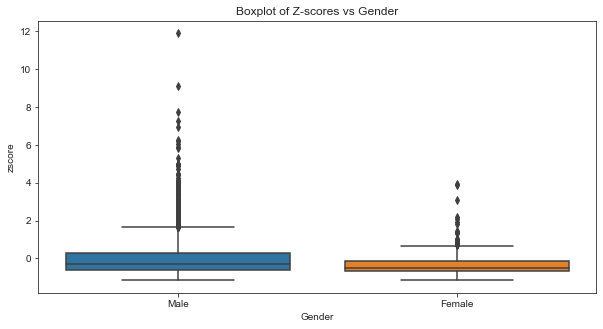

In [72]:
sns.boxplot(x="Gender", y="zscore", data = standardized)
plt.title("Boxplot of Z-scores vs Gender")

In [73]:
for i, j in standardized.groupby('Gender'):
    display(j.describe())

,Citations,Earliest_Pub,Age,citperyear,citperyear13,zscore
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,475.709677,1992.116129,27.883871,16.554618,6.185260,-0.287867
std,716.684604,9.120165,9.120165,21.400093,7.878863,0.658736
min,0.000000,1967.000000,10.000000,0.000000,0.000000,-1.120902
25%,109.000000,1986.000000,21.000000,4.230252,1.540643,-0.643406
50%,240.000000,1993.000000,27.000000,9.871053,3.798123,-0.491653
75%,615.500000,1999.000000,34.000000,20.492857,7.649517,-0.114883
max,6860.000000,2010.000000,53.000000,170.031250,60.115125,3.906114


,Citations,Earliest_Pub,Age,citperyear,citperyear13,zscore
count,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000
mean,988.602723,1986.400080,33.599920,28.171185,9.924545,0.035738
std,1561.622768,11.194044,11.194044,38.461738,13.314503,1.029228
min,0.000000,1950.000000,7.000000,0.000000,0.000000,-1.160355
25%,215.000000,1979.000000,25.000000,7.176471,2.589171,-0.592701
50%,501.000000,1987.000000,33.000000,16.538462,5.999998,-0.301375
75%,1126.000000,1995.000000,41.000000,34.800000,12.646909,0.302705
max,19975.000000,2013.000000,70.000000,646.958333,249.352048,11.882015


Text(0, 0.5, 'Counts')

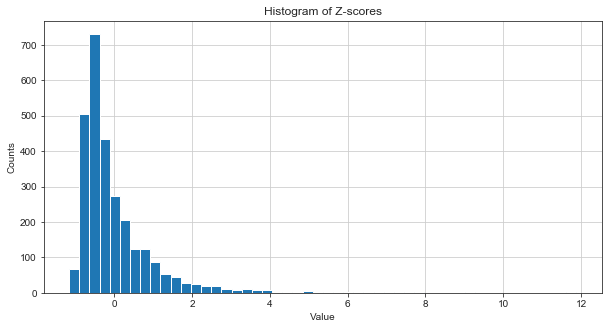

In [74]:
standardized.zscore.hist(bins=50)
plt.title("Histogram of Z-scores")
plt.xlabel("Value")
plt.ylabel("Counts")

# Permutation Test Gender

In [75]:
z = standardized[standardized.Gender=='Male'].zscore
y = standardized[standardized.Gender=='Female'].zscore


In [76]:


delta = y.mean() - z.mean()
numSamples = 10000
l=[]
for i in range(numSamples):
    x = run_permutation_test(pooled,z.size,y.size)
    l.append(x)
print(check(l))

0.0
